In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [27]:
c = cast
super = c[(c.character == 'Superman') | (c.character == 'Batman')]
super = super.groupby(['year', 'character']).size()
super = super.unstack('character').fillna('0')
super['Superman'] - super['Batman']
super

TypeError: unsupported operand type(s) for -: 'float' and 'str'

### How many years have been "Batman years", with more Batman characters than Superman characters?

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

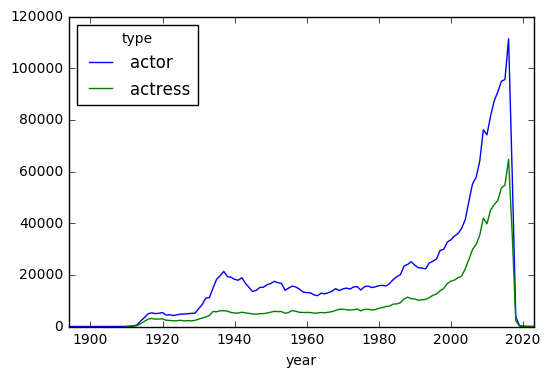

In [62]:
c = cast
d = c.groupby(['year', 'type']).size()
d = d.unstack('type').plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

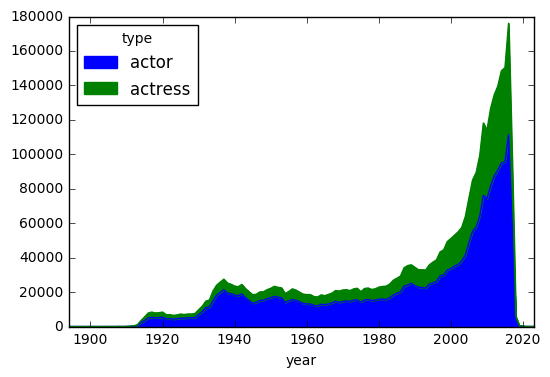

In [63]:
c = cast
d = c.groupby(['year', 'type']).size()
d = d.unstack('type').plot(kind = "area")

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

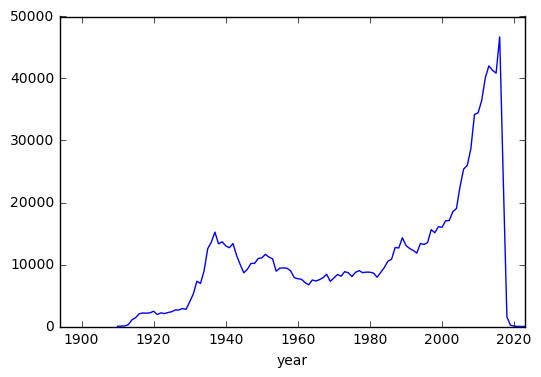

In [13]:
c = cast
e = c.groupby(['year', 'type']).size()
e = e.unstack('type')
(e.actor - e.actress).plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

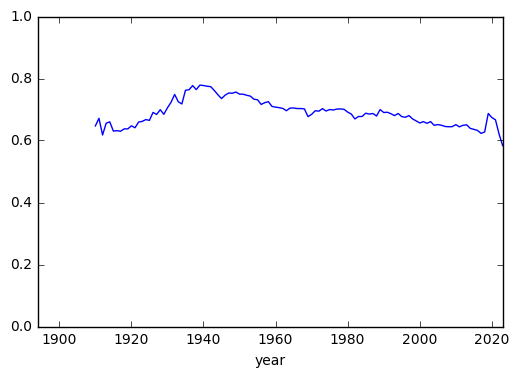

In [64]:
c = cast
e = c.groupby(['year', 'type']).size()
e = e.unstack('type')
(e.actor / (e.actor + e.actress)).plot(ylim=[0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

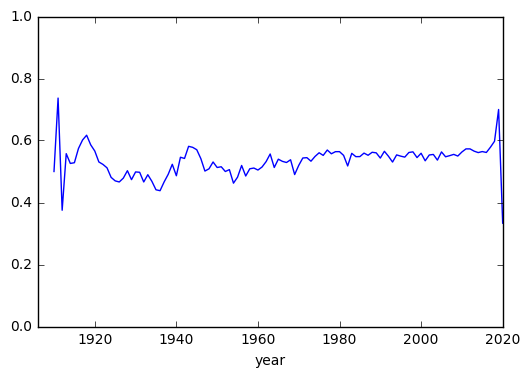

In [16]:
c = cast
c = c[c.n == 2]
e = c.groupby(['year', 'type']).size()
e = e.unstack('type')
(e.actor / (e.actor + e.actress)).plot(ylim=[0,1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

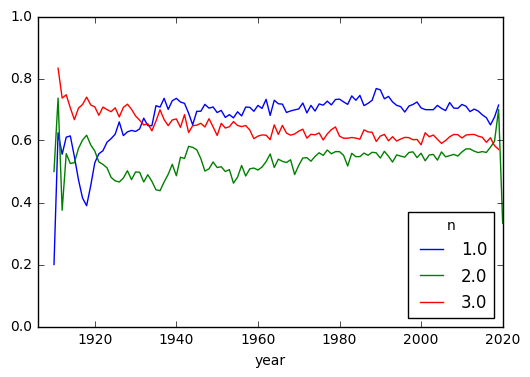

In [56]:
c = cast
c = c[c.n <= 3]
e = c.groupby(['year', 'type', 'n']).size()
e = e.unstack('type')
(e.actor / (e.actor + e.actress)).unstack('n').plot(ylim=[0,1])